In [ ]:
#svmnonlinear
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [ ]:
data_set= pd.read_csv('SVM.csv')  
  
#Extracting Independent and dependent Variable  
X= data_set.iloc[:, [2,3]].values  
y= data_set.iloc[:, 4].values  
#X = np.random.randn(200, 2)
#y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 0.5)  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm 

array([[64,  4],
       [ 3, 29]])

<ipython-input-25-d6fcd6d8ecf7>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


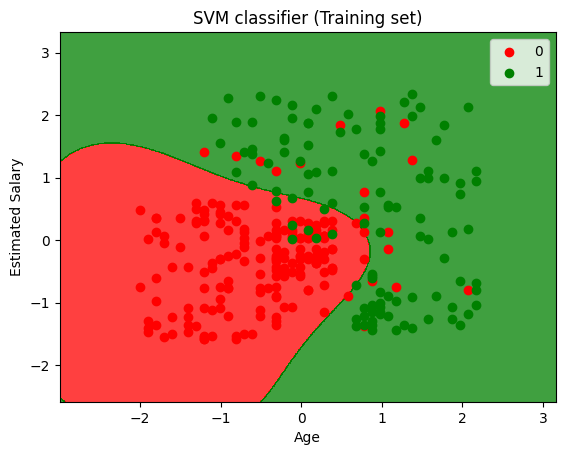

In [ ]:
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red', 'green')))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

<ipython-input-26-ddf28ec3e788>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


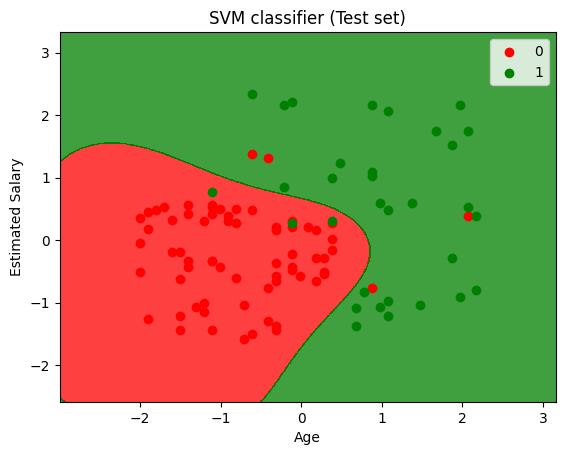

In [ ]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('red','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'green'))(i), label = j)  
mtp.title('SVM classifier (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NonlinearSVM:
    def __init__(self, kernel='rbf', gamma=1.0, C=1.0, tol=1e-3, max_passes=5):
        self.kernel = kernel
        self.gamma = gamma
        self.C = C
        self.tol = tol
        self.max_passes = max_passes
    
    def _kernel(self, X1, X2):
        if self.kernel == 'rbf':
            return np.exp(-self.gamma*np.linalg.norm(X1 - X2)**2)
        elif self.kernel == 'poly':
            return (1 + np.dot(X1, X2))**self.gamma
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.alphas = np.zeros(len(X))
        self.b = 0.0
        self.K = np.zeros((len(X), len(X)))
        for i in range(len(X)):
            for j in range(len(X)):
                self.K[i, j] = self._kernel(X[i], X[j])
        self._smo(X, y)
    
    def _predict_one(self, x):
        return np.sign(np.sum(self.alphas*self.y*self._kernel(self.X, x)) + self.b)
    
    def predict(self, X):
        return np.array([self._predict_one(x) for x in X])
    
    def _smo(self, X, y):
        passes = 0
        num_changed_alphas = 0
        while passes < self.max_passes and num_changed_alphas > 0:
            num_changed_alphas = 0
            for i in range(len(X)):
                Ei = self.predict(X[i]) - y[i]
                if (y[i]*Ei < -self.tol and self.alphas[i] < self.C) or (y[i]*Ei > self.tol and self.alphas[i] > 0):
                    j = np.random.choice(list(range(i)) + list(range(i+1, len(X))))
                    Ej = self.predict(X[j]) - y[j]
                    alpha_i_old = self.alphas[i]
                    alpha_j_old = self.alphas[j]
                    if y[i] != y[j]:
                        L = max(0, self.alphas[j] - self.alphas[i])
                        H = min(self.C, self.C + self.alphas[j] - self.alphas[i])
                    else:
                        L = max(0, self.alphas[i] + self.alphas[j] - self.C)
                        H = min(self.C, self.alphas[i] + self.alphas[j])
                    if L == H:
                        continue
                    eta = 2*self.K[i, j] - self.K[i, i] - self.K[j, j]
                    if eta >= 0:
                        continue
                    self.alphas[j] -= y[j]*(Ei - Ej)/eta
                    self.alphas[j] = max(self.alphas[j], L)
                    self.alphas[j] = min(self.alphas[j], H)
                    if abs(self.alphas[j] - alpha_j_old) < 1e-5:
                        continue
                    self.alphas[i] += y[i]*y[j]*(alpha_j_old - self.alphas[j])
                    b1 = self.b - Ei - y[i]*(self.alphas[i] - alpha_i_old)*self.K[i, i] - y[j]*(self.alphas[j] - alpha_j_old)*self.K[i, j]
                   
                    b2 = self.b - Ej - y[i]*(self.alphas[i] - alpha_i_old)*self.K[i, j] - y[j]*(self.alphas[j] - alpha_j_old)*self.K[j, j]
                    if 0 < self.alphas[i] < self.C:
                        self.b = b1
                    elif 0 < self.alphas[j] < self.C:
                        self.b = b2
                    else:
                        self.b = (b1 + b2)/2.0
                    num_changed_alphas += 1
            if num_changed_alphas == 0:
                passes += 1
    
    def plot(self, X, y):
    # create a meshgrid over the feature space
      x1, x2 = np.meshgrid(np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100), 
                          np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100))
      # compute predicted values for each point in the meshgrid
      Z = np.zeros(x1.shape)
      for i in range(x1.shape[0]):
          for j in range(x1.shape[1]):
              Z[i, j] = self._predict_one(np.array([x1[i, j], x2[i, j]]))
      
      # plot the contour plot of predicted values
      plt.contourf(x1, x2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
      plt.colorbar()
      # plot the training data points
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
      
      # plot the hyperplane
      w = np.dot(self.alphas * y, self.X)
      b = self.b
      xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
      yp = - (w[0] * xp + b) / w[1]
      plt.plot(xp, yp, '-k')
      
      plt.title('Nonlinear SVM')
      plt.show()



<ipython-input-38-7cf8fd4f54cc>:97: RuntimeWarning: invalid value encountered in true_divide
  yp = - (w[0] * xp + b) / w[1]


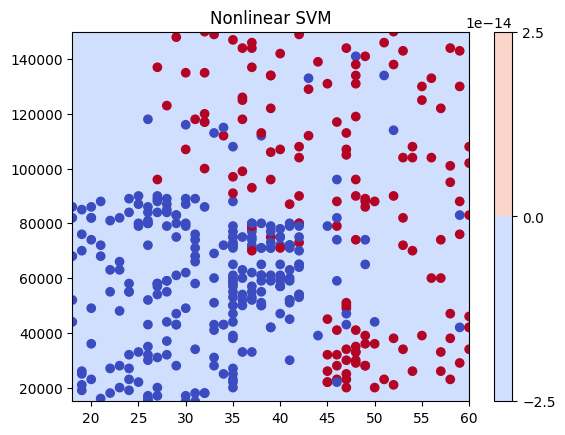

<ipython-input-42-d8fe7532bf95>:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


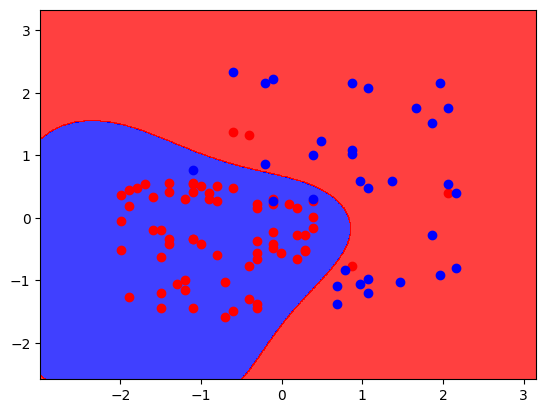

In [ ]:
# generate sample data
#X = np.random.randn(200, 2)
#y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 0.5)

# train SVM
svm = NonlinearSVM(kernel='rbf', gamma=10.0, C=10.0, tol=1e-3, max_passes=5)
svm.fit(X, y)

# plot decision boundary

svm.plot(X, y)
x_set, y_set = x_test, y_test  
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
nm.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  alpha = 0.75, cmap = ListedColormap(('blue','red' ))) 

mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(nm.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('red', 'blue'))(i), label = j)  
